# Car collector

Predict the model of a car from images.

## Imports

In [1]:
from fastai.vision import *

## Setup

In [2]:
path = Path('own_data/autot')

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes[:10]

['Alfa_Romeo_Giulia',
 'Audi_A3',
 'Audi_A4',
 'Audi_A6',
 'Audi_Q2',
 'Audi_Q7',
 'Audi_R8',
 'Audi_TT',
 'BMW_X1',
 'BMW_X5']

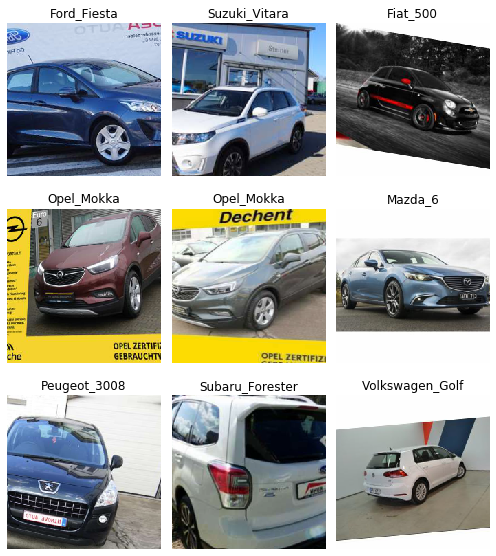

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
len(data.train_ds), len(data.valid_ds)

(21231, 5307)

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [10]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,3.400720,2.518588,0.340305,06:15
1,2.246299,1.719261,0.522141,06:09
2,1.742140,1.346547,0.630111,06:10
3,1.502114,1.264532,0.649520,06:10


In [13]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


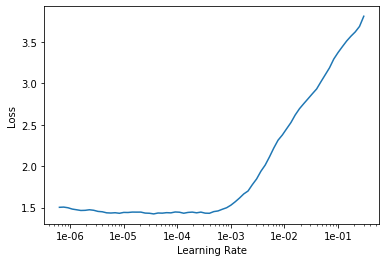

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(8, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,1.297564,1.046555,0.707933,08:06
1,1.017720,0.817023,0.767477,08:11
2,0.799328,0.695305,0.803844,08:10
3,0.583849,0.541616,0.848690,08:11
4,0.406503,0.453589,0.873940,08:11
5,0.261038,0.378066,0.897494,08:11
6,0.189314,0.344373,0.905408,08:11
7,0.156101,0.342096,0.905219,08:11


In [18]:
learn.save('final-model', return_path=True)

PosixPath('own_data/autot/models/final-model.pth')

## Analyze results

In [19]:
learn.load('final-model');

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

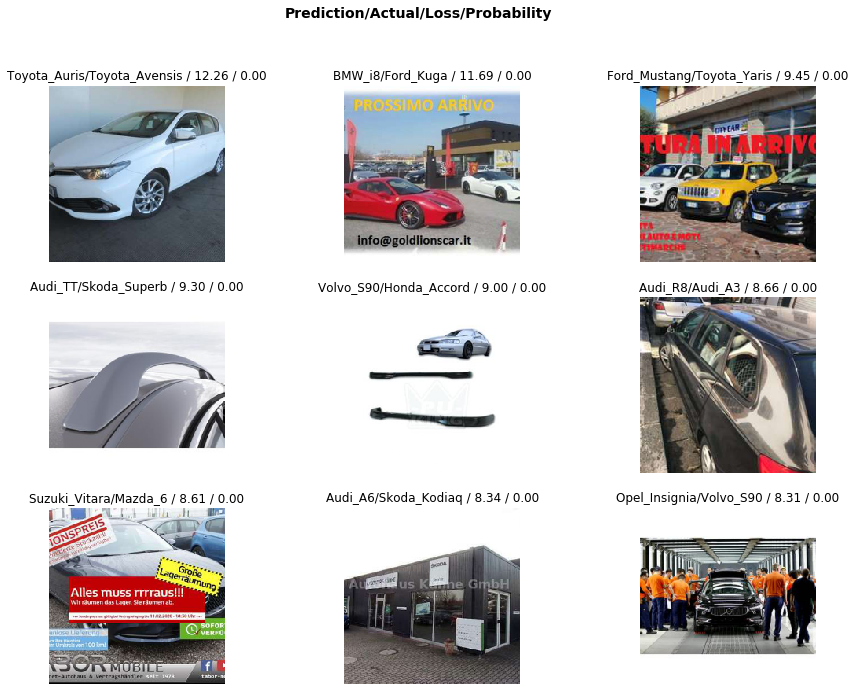

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

In [23]:
interp.most_confused(min_val=5)

[('Volvo_V90', 'Volvo_S90', 14),
 ('Audi_A4', 'Audi_A6', 11),
 ('Audi_A6', 'Audi_A4', 11),
 ('Volvo_S90', 'Volvo_V90', 10),
 ('Volkswagen_Golf', 'Volkswagen_Polo', 7),
 ('Audi_A3', 'Audi_A4', 6),
 ('Volkswagen_Polo', 'Volkswagen_Golf', 6),
 ('Mazda_3', 'Mazda_6', 5),
 ('Toyota_Auris', 'Toyota_Corolla', 5)]

## Export the model

Le's do a few tests with validation data and see how the model performs.

In [24]:
learn.export('export_model.pkl')

In [25]:
defaults.device = torch.device('cpu')

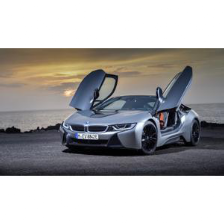

In [40]:
validation_image = data.valid_ds[0][0]
validation_image

In [41]:
learn = load_learner(path, 'export_model.pkl')

In [42]:
pred_class,pred_idx,outputs = learn.predict(validation_image)
pred_class

Category BMW_i8

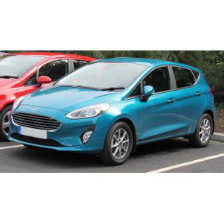

In [46]:
validation_image = data.valid_ds[30][0]
validation_image

In [47]:
pred_class,pred_idx,outputs = learn.predict(validation_image)
pred_class

Category Ford_Fiesta

Looks to work fine enough, now it's time to test it in the wild :)